In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_excel("Irish.xlsx")
dataset.head()

,Year,Cases
0,1905-06-12,243000.0
1,1905-06-13,214000.0
2,1905-06-14,219500.0
3,1905-06-15,225000.0
4,1905-06-16,239500.0


In [5]:
dataset.set_index('Year', inplace=True)
dataset.head()

,Cases
Year,
1905-06-12,243000.0
1905-06-13,214000.0
1905-06-14,219500.0
1905-06-15,225000.0
1905-06-16,239500.0


In [6]:
dataset=dataset.fillna(method="ffill")

<function matplotlib.pyplot.show(close=None, block=None)>

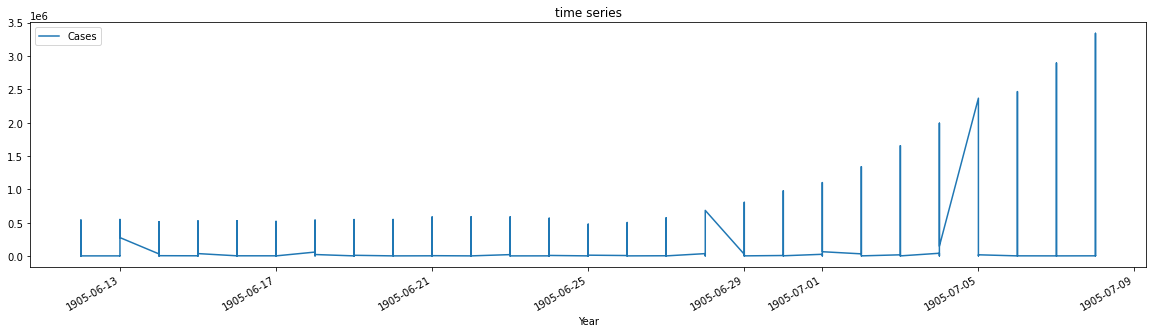

In [7]:
dataset.plot(figsize=(20,5))
plt.title("time series")
plt.show

In [8]:
def to_supervised(train,n_input,n_out):
    #falten data
    data=train
    X,y=list(),list()
    in_start=0
    for _ in range(len(data)):
        in_end=in_start+ n_input
        out_end=in_end + n_out
        if out_end<=len(data):
            x_input=data[ in_start:in_end,0]
            x_input=x_input.reshape((len(x_input)))
            X.append(x_input)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return array(X), array(y)   

In [9]:
import statsmodels.tsa.stattools as sts

In [10]:
sts.adfuller(dataset.Cases)

(-14.086414060476837,
 2.7703618270419004e-26,
 29,
 4101,
 {'1%': -3.431945561538905,
  '5%': -2.862245031653711,
  '10%': -2.567145295038988},
 89144.33764181501)

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

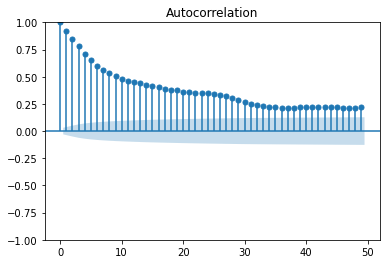

In [12]:
plot_acf(dataset, lags=49)
plt.show()

In [13]:
from numpy import array

In [14]:
n_step=1
lags=22

In [15]:
dataset=np.array(dataset)
dataset

array([[2.430e+05],
       [2.140e+05],
       [2.195e+05],
       ...,
       [5.000e+01],
       [5.000e+01],
       [5.000e+01]])

In [16]:
X,y=to_supervised(dataset,n_input=lags,n_out=n_step)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
x_train=scaler.fit_transform(x_train)
y_train=scaler.fit_transform(y_train)
x_train.shape,y_train.shape

((2753, 22), (2753, 1))

In [22]:
x_test=scaler.fit_transform(x_test)
y_tset=scaler.fit_transform(y_test)
x_test.shape,y_test.shape

((1356, 22), (1356, 1))

In [23]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,Conv1D,MaxPooling1D,Flatten,Dropout

In [24]:
x_train_3d=x_train.reshape(x_train.shape[0],x_train.shape[1],1)                         
x_test_3d=x_test.reshape(x_test.shape[0],x_test.shape[1],1)   

In [26]:
model_Gru=Sequential()
model_Gru.add(GRU(10,activation="relu",input_shape=(x_train_3d.shape[1],x_train_3d.shape[2]),return_sequences=True))

model_Gru.add(GRU(20,activation="relu",return_sequences=True))

model_Gru.add(GRU(30,activation="relu",return_sequences=False))
model_Gru.add(Dense(n_step))
model_Gru.compile(optimizer="adam", loss='mse')

In [27]:
model_Gru.fit(x_train_3d,y_train,epochs=100,batch_size=16)

Epoch 1/100
173/173 [==============================] - 6s 15ms/step - loss: 9.7842e-04
Epoch 2/100
173/173 [==============================] - 3s 17ms/step - loss: 5.9886e-04
Epoch 3/100
173/173 [==============================] - 3s 16ms/step - loss: 5.7133e-04
Epoch 4/100
173/173 [==============================] - 3s 17ms/step - loss: 3.9983e-04
Epoch 5/100
173/173 [==============================] - 3s 16ms/step - loss: 4.2022e-04
Epoch 6/100
173/173 [==============================] - 3s 17ms/step - loss: 3.4367e-04
Epoch 7/100
173/173 [==============================] - 3s 15ms/step - loss: 3.8575e-04
Epoch 8/100
173/173 [==============================] - 3s 16ms/step - loss: 3.4193e-04
Epoch 9/100
173/173 [==============================] - 3s 16ms/step - loss: 3.1034e-04
Epoch 10/100
173/173 [==============================] - 3s 16ms/step - loss: 3.4024e-04
Epoch 11/100
173/173 [==============================] - 3s 16ms/step - loss: 3.2062e-04
Epoch 12/100
173/173 [===================

Epoch 94/100
173/173 [==============================] - 3s 16ms/step - loss: 1.8642e-04
Epoch 95/100
173/173 [==============================] - 3s 16ms/step - loss: 1.9422e-04
Epoch 96/100
173/173 [==============================] - 3s 16ms/step - loss: 1.8567e-04
Epoch 97/100
173/173 [==============================] - 3s 15ms/step - loss: 2.0545e-04
Epoch 98/100
173/173 [==============================] - 3s 15ms/step - loss: 1.9369e-04
Epoch 99/100
173/173 [==============================] - 3s 16ms/step - loss: 1.8681e-04
Epoch 100/100
173/173 [==============================] - 3s 16ms/step - loss: 1.9312e-04


In [28]:
predict_Gru=model_Gru.predict(x_test_3d)
predict_Gru.shape

(1356, 1)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse_Gru=mean_squared_error(y_test,predict_Gru)
mse_Gru

7529441499.00072

In [31]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_pred_Gru=scaler.inverse_transform(predict_Gru)

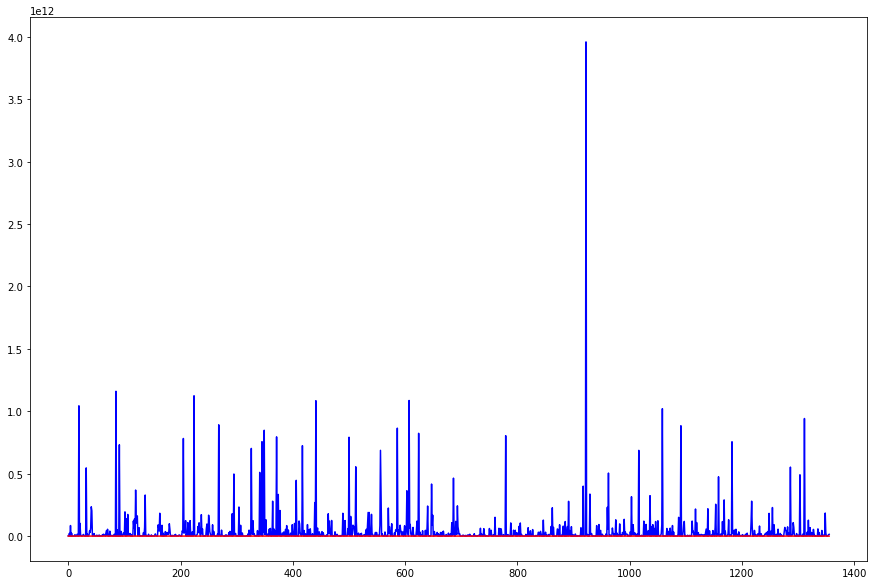

In [32]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_test[:,:2],color='b',label="Real")
plt.plot(inv_y_pred_Gru,color='r',label="predicted")